In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("data.csv")  # replace with your actual file name
print(df.shape)

C:\Users\Shadvi\AppData\Local\Temp\ipykernel_25908\3230014258.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")  # replace with your actual file name


(6405008, 18)


In [6]:
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1       1.0  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2       1.0  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3       1.0  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4       2.0  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
4            0.0         1.0                  N           193           193   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB
None


In [8]:
# Drop rows with missing values
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df = df[df.trip_distance>0]

In [12]:
df = df[df.passenger_count>0]

In [13]:
# Remove invalid/zero values
df = df[
    (df['fare_amount'] >= 0) &
    (df['extra'] >= 0) &
    (df['mta_tax'] >= 0) &
    (df['tip_amount'] >= 0) &
    (df['tolls_amount'] >= 0) &
    (df['improvement_surcharge'] >= 0) &
    (df['total_amount'] >= 0) &
    (df['congestion_surcharge'] >= 0)
]

In [14]:
df.shape

(6142816, 18)

In [15]:
numerical_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

def remove_outliers(df):
    for col in numerical_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = remove_outliers(df)

In [16]:
df_clean.shape

(4594648, 18)

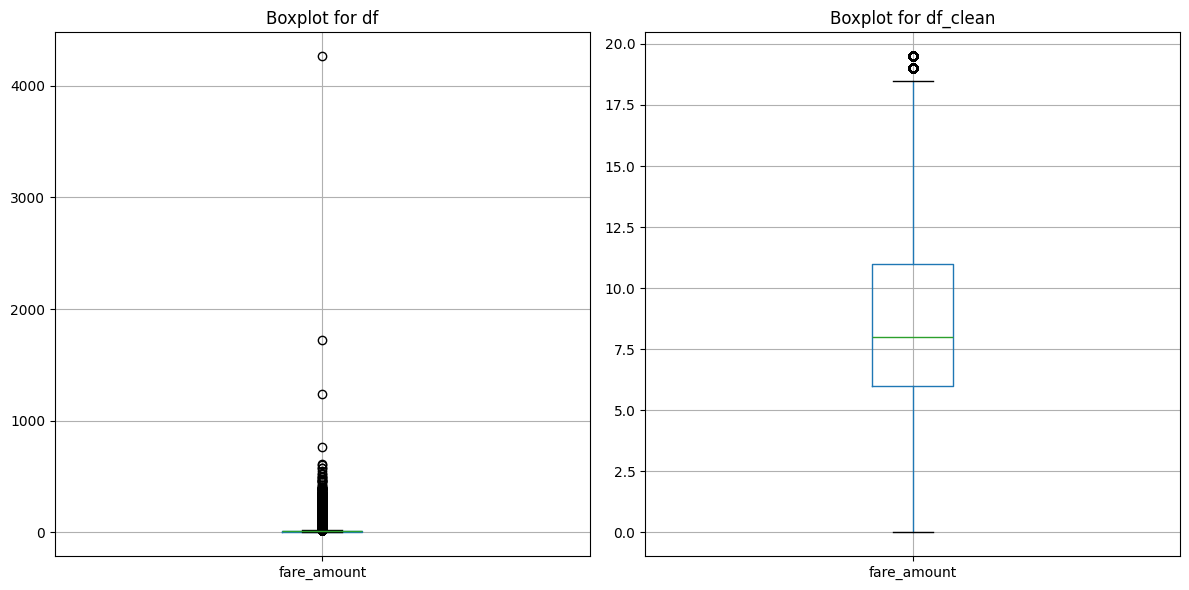

In [17]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df[['fare_amount']].boxplot(ax=axes[0])
axes[1].set_title("Boxplot for df_clean")

df_clean[['fare_amount']].boxplot(ax=axes[1])
axes[0].set_title("Boxplot for df")

plt.tight_layout()
plt.show()

In [18]:
df_clean.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,4.594648e+06,4.594648e+06,4.594648e+06,4594648.0,4.594648e+06,4.594648e+06,4.594648e+06,4.594648e+06,4.594648e+06,4594648.0,4.594648e+06,4594648.0,4.594648e+06,4.594648e+06,4594648.0
mean,1.659484e+00,1.251986e+00,1.653406e+00,1.0,1.694140e+02,1.678109e+02,1.247388e+00,8.796597e+00,1.174355e+00,0.5,1.697520e+00,0.0,3.000000e-01,1.412028e+01,2.5
std,4.738829e-01,5.255345e-01,1.009516e+00,0.0,6.507218e+01,6.716747e+01,4.380438e-01,3.531703e+00,1.247328e+00,0.0,1.273650e+00,0.0,1.165734e-15,4.159328e+00,0.0
min,1.000000e+00,1.000000e+00,1.000000e-02,1.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.5,0.000000e+00,0.0,3.000000e-01,4.300000e+00,2.5
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.0,1.370000e+02,1.250000e+02,1.000000e+00,6.000000e+00,0.000000e+00,0.5,0.000000e+00,0.0,3.000000e-01,1.080000e+01,2.5
50%,2.000000e+00,1.000000e+00,1.400000e+00,1.0,1.630000e+02,1.630000e+02,1.000000e+00,8.000000e+00,5.000000e-01,0.5,1.860000e+00,0.0,3.000000e-01,1.350000e+01,2.5
75%,2.000000e+00,1.000000e+00,2.170000e+00,1.0,2.340000e+02,2.340000e+02,1.000000e+00,1.100000e+01,2.500000e+00,0.5,2.560000e+00,0.0,3.000000e-01,1.663000e+01,2.5
max,2.000000e+00,3.000000e+00,5.760000e+00,1.0,2.650000e+02,2.650000e+02,3.000000e+00,1.950000e+01,3.500000e+00,0.5,6.400000e+00,0.0,3.000000e-01,2.580000e+01,2.5


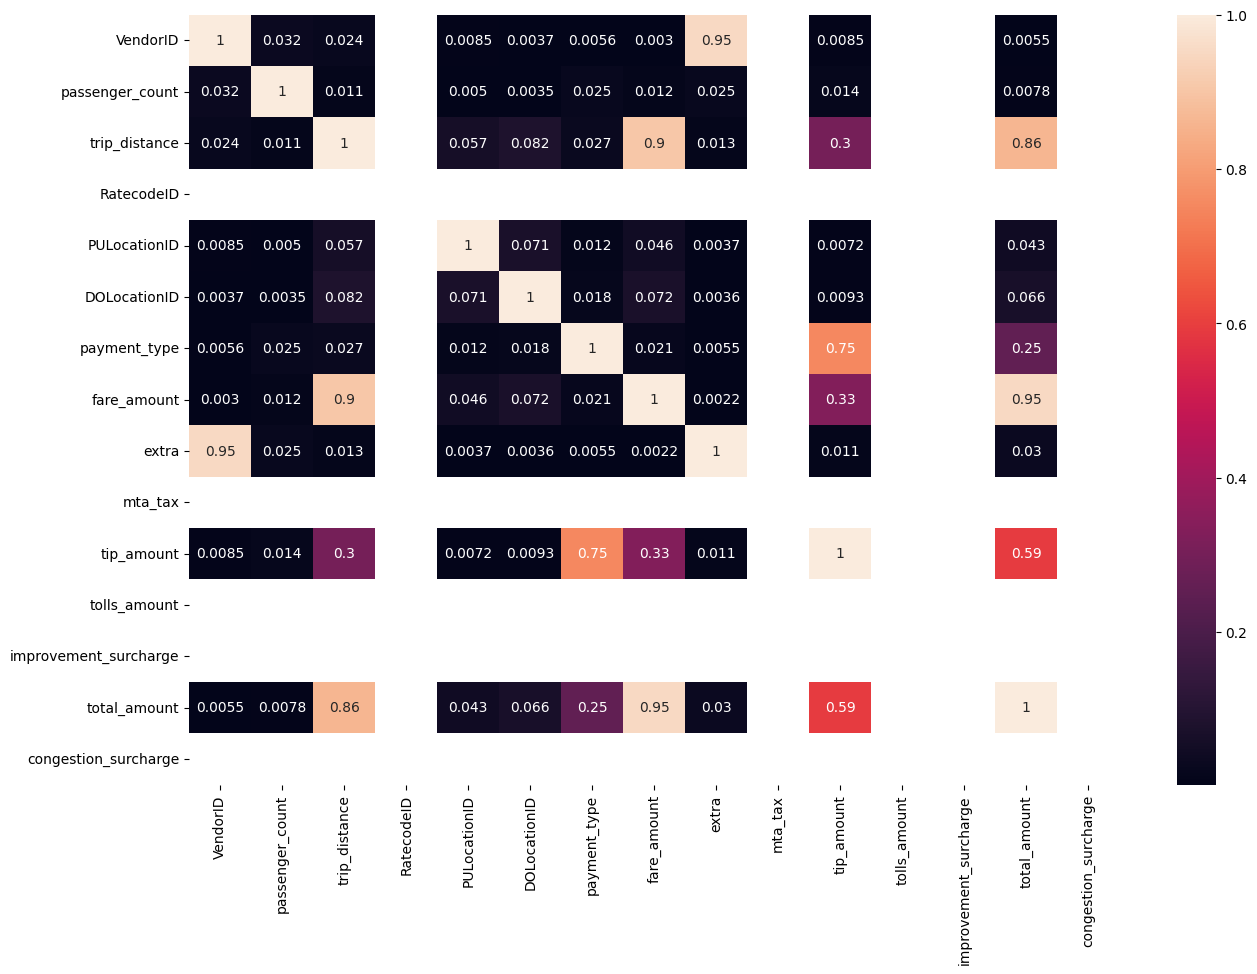

In [19]:
#Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df_clean[numerical_columns].corr().abs(),annot=True)
plt.show()

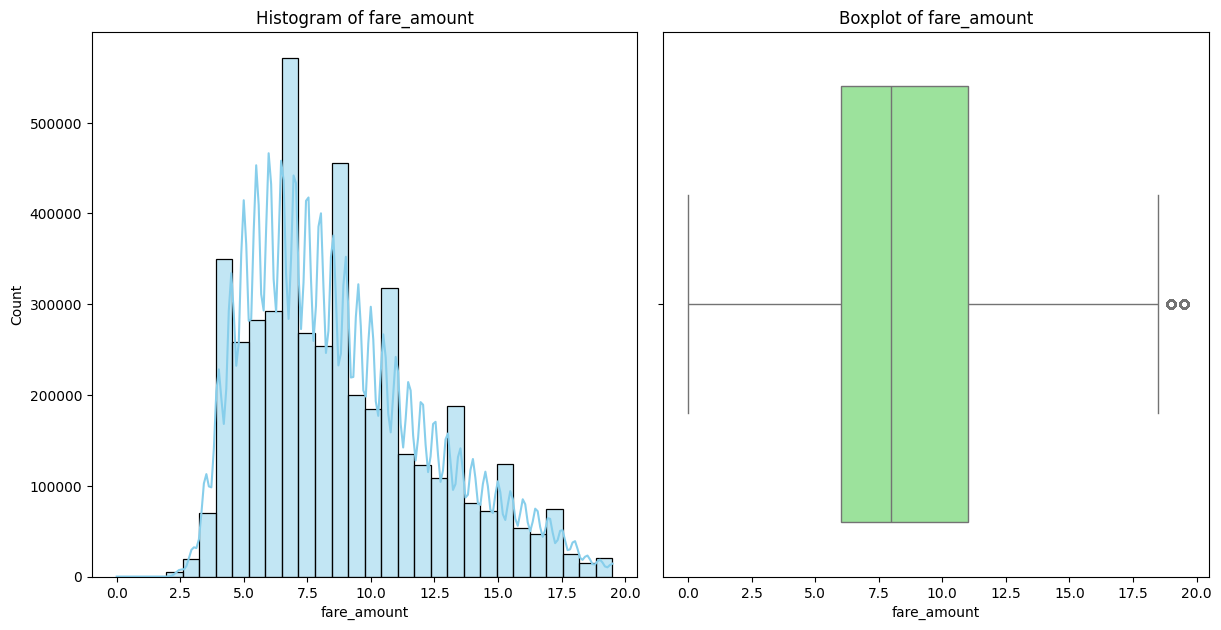

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.histplot(df_clean['fare_amount'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of fare_amount')

plt.subplot(2, 3, 2)
sns.boxplot(x=df_clean['fare_amount'], color='lightgreen')
plt.title('Boxplot of fare_amount')

plt.tight_layout()
plt.show()

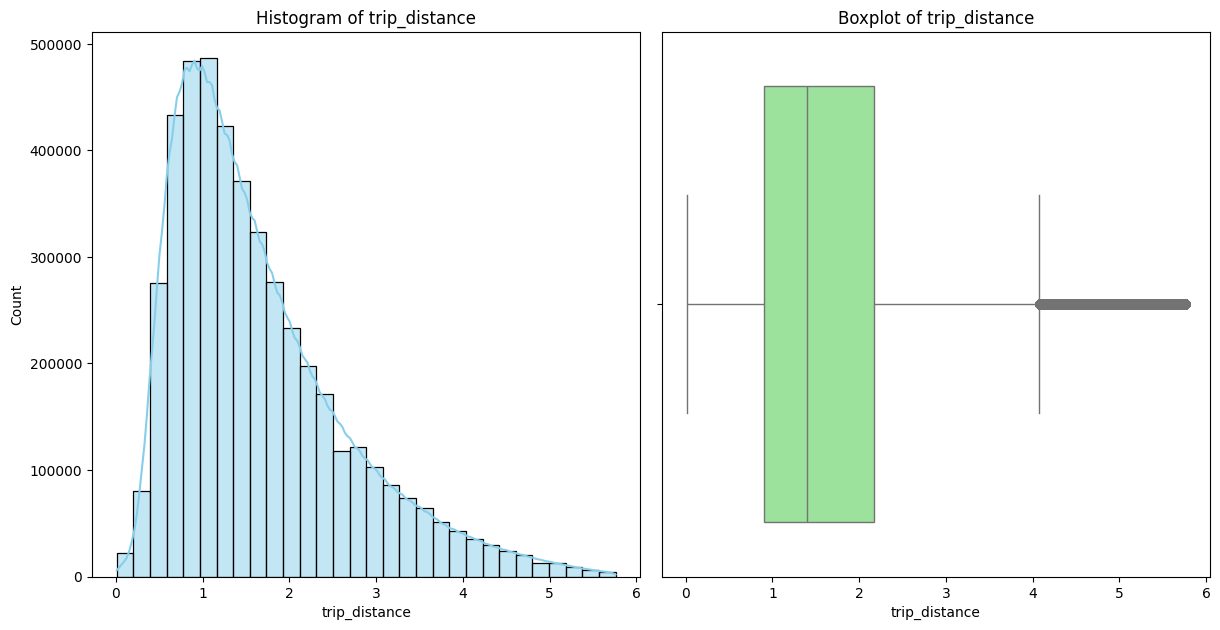

In [21]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.histplot(df_clean['trip_distance'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of trip_distance')

plt.subplot(2, 3, 2)
sns.boxplot(x=df_clean['trip_distance'], color='lightgreen')
plt.title('Boxplot of trip_distance')

plt.tight_layout()
plt.show()

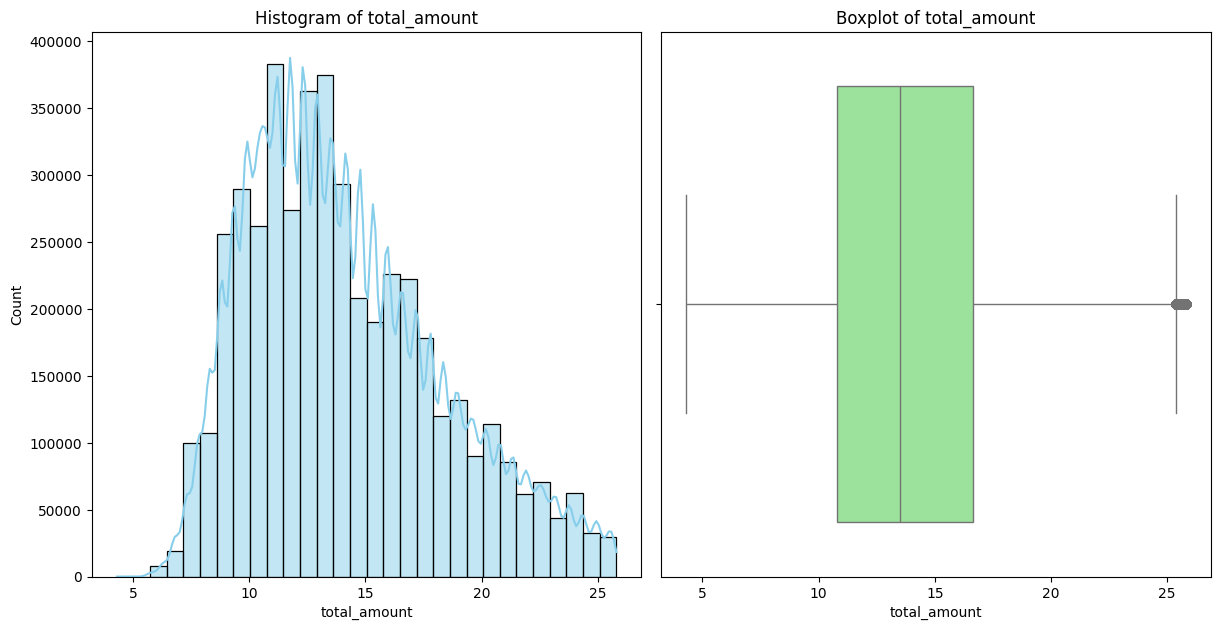

In [22]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.histplot(df_clean['total_amount'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of total_amount')

plt.subplot(2, 3, 2)
sns.boxplot(x=df_clean['total_amount'], color='lightgreen')
plt.title('Boxplot of total_amount')

plt.tight_layout()
plt.show()

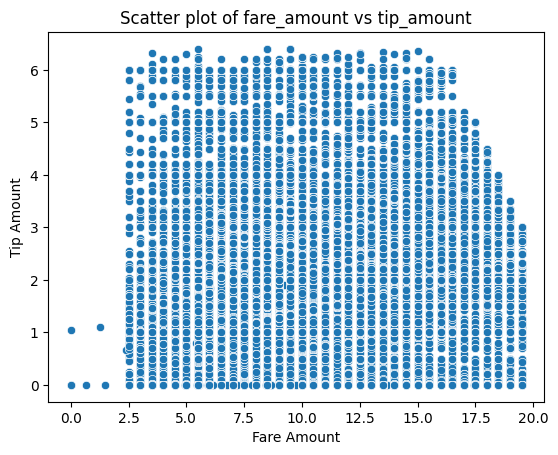

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_clean, x='fare_amount', y='tip_amount')

plt.title('Scatter plot of fare_amount vs tip_amount')
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.show()

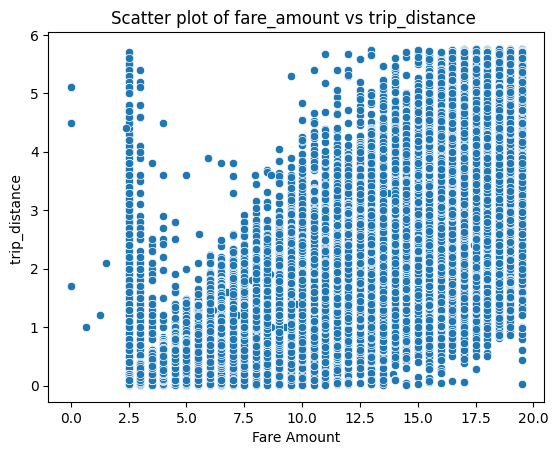

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_clean, x='fare_amount', y='trip_distance')

plt.title('Scatter plot of fare_amount vs trip_distance ')
plt.xlabel('Fare Amount')
plt.ylabel('trip_distance ')
plt.show()

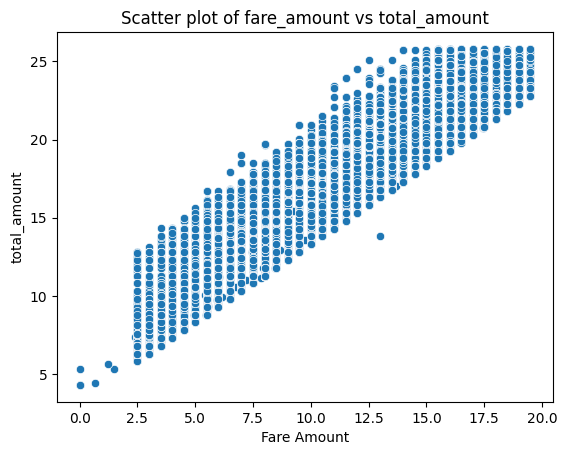

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_clean, x='fare_amount', y='total_amount')

plt.title('Scatter plot of fare_amount vs total_amount')
plt.xlabel('Fare Amount')
plt.ylabel('total_amount')
plt.show()

In [26]:
corr_columns = ['trip_distance','tip_amount','total_amount']
X=df_clean[corr_columns]
Y=df_clean['fare_amount']

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
[(
"scale",StandardScaler(),corr_columns
)],remainder="passthrough")

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [29]:
X_train

,trip_distance,tip_amount,total_amount
6187355,0.50,1.45,8.75
2490925,0.94,0.00,8.80
2441297,0.50,1.66,9.96
5002931,2.08,2.86,17.16
2645278,1.58,1.50,14.30
...,...,...,...
1589703,0.70,1.00,11.30
2184217,4.80,0.00,20.80
3099142,0.49,0.00,8.30
5938017,1.79,3.08,15.38


In [30]:
X_test

,trip_distance,tip_amount,total_amount
2111260,2.71,2.96,17.76
616671,1.48,1.20,13.00
4997710,1.00,0.00,11.30
4545190,1.08,0.00,9.80
5741955,0.56,1.76,10.56
...,...,...,...
5367719,2.50,3.55,21.35
1742034,0.65,1.00,9.80
2006931,1.67,2.56,15.36
1009985,1.90,2.45,14.75


In [31]:
y_train

6187355     4.0
2490925     5.0
2441297     4.0
5002931    11.0
2645278     8.5
           ... 
1589703     6.0
2184217    17.5
3099142     4.0
5938017     9.0
2359830     9.0
Name: fare_amount, Length: 3675718, dtype: float64

In [32]:
y_test

2111260    11.0
616671      8.5
4997710     8.0
4545190     6.0
5741955     5.5
           ... 
5367719    13.5
1742034     5.5
2006931     9.5
1009985     8.5
714509     17.0
Name: fare_amount, Length: 918930, dtype: float64

In [33]:
from sklearn.metrics import roc_auc_score,roc_curve
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [34]:
X_train_transformed

array([[-1.142787  , -0.19446353, -1.29141904],
       [-0.70688172, -1.33289251, -1.27939713],
       [-1.142787  , -0.0295876 , -1.00048897],
       ...,
       [-1.15269394, -1.33289251, -1.39961617],
       [ 0.13520802,  1.08528768,  0.3026854 ],
       [-0.181814  , -1.33289251, -0.43786387]], shape=(3675718, 3))

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train_transformed, y_train)


LinearRegression()

In [41]:
y_pred_model = model.predict(X_test_transformed)

In [42]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_model)
mse = mean_squared_error(y_test, y_pred_model)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_model)
mape = np.mean(np.abs((y_test - y_pred_model) / y_test)) * 100

print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')
print(f'RMSE (Root Mean Squared Error): {rmse}')
print(f'R² (R-squared): {r2}')
print(f'MAPE (Mean Absolute Percentage Error): {mape}')

MAE (Mean Absolute Error): 0.3467209186979669
MSE (Mean Squared Error): 0.1508790186516989
RMSE (Root Mean Squared Error): 0.3884314851446763
R² (R-squared): 0.9879158060603659
MAPE (Mean Absolute Percentage Error): 4.555486654312902


In [44]:

import streamlit as st
import pickle

pickle.dump(model, open('model_lr.pkl', 'wb'))
